## Goal

is to implement a Naive Bayes Multinomial classifier using  bag of words model for the classification of text (movie reviews) into different categories..

**Note** Please note that you are allowed to use numpy, scipy, pandas, re.

Once model is built and tested on the provided dataset. You will use the learned techniques to compete in a [Kaggle](https://www.kaggle.com/c/word2vec-nlp-tutorial) competition and report your final score and leaderboard ranking.

In [10]:
%pylab inline
import scipy.stats
from collections import defaultdict
import numpy as np
import tools as t

Populating the interactive namespace from numpy and matplotlib


In [11]:
import re
import string
def parse_string(s): 
    """"
        Parse the input string and tokenize it using regular expressisons:
        First clean the string such that it does not have any punctuation or number, it must only have a-z and A-Z.
        Please note that while doing this, the spaces much not get disturbed, but in case of multiple spaces convert 
        them to one space.
        Then convert the string to lower case and return its words as a list of strings.
        
        Example:
        --------
        Input :  computer scien_tist-s are,,,  the  rock__stars of tomorrow_ <cool>  ????
        Output:  ['computer', 'scientists', 'are', 'the', 'rockstars', 'of', 'tomorrow']
        
        Parameters:
        ----------
        string: string to be parsed...
        re: regular expression to be used for the tokenization.
        
        Returns:
        ---------
        list of tokens extracted from the string...
    """
    # YOUR CODE HERE
    exclude = set(string.punctuation)
    s = ''.join(ch for ch in s if ch not in exclude)
    result=re.findall("[a-zA-z]+",s)
    return result

In [12]:
def parse_file(filename): # Parse a given file
    """"
        Parameters:
        ----------
        filename: name of text file to be read
   
        
        Returns:
        ---------
        read file as raw string (with \n, \t, \r, etc included)
    """
    # YOUR CODE HERE
    with open(filename,'r') as f:
        text= f.read()
    return text

In [13]:
def files_to_strings(X):
    
    """
        Read an array (or list) of files where each file content is read in a string...
        Input:
        -------
        X an array (or list) of file names
        
        Returns:
        --------
        X as a numpy array with each row containing a read string from the file...
    """
    
    # YOUR CODE HERE
    files_text=[]
    for filename in X:
        with open(filename,'r') as f:
            text= f.read()
        files_text.append(text)
        
    return np.asarray(files_text)

In [14]:
from nose.tools import assert_equal, assert_list_equal

assert_list_equal(parse_string("computer scien_tist-s are,,,  the  rock__stars of tomorrow_  ????"),
        ['computer','scientists','are','the','rockstars','of','tomorrow'], "Incorrect cleanning")


strings = files_to_strings(np.array(["./data/imdb1/neg/cv000_29416.txt", "./data/imdb1/pos/cv000_29590.txt"]))
with open("./data/imdb1/neg/cv000_29416.txt") as f:
    text = f.read()

assert_equal(strings[0], text, "At first index should be text of first file")
assert_equal(strings.shape, (2,), "Shape must be (2,) for two files in list")

# Improvement by Excluding Stop Words...

You can improve your score further by excluding the commonly occuring words (also known as stop words) in the English language.



In [15]:
#read and create a set of stop 
import nltk
stopwords=set(t.read_txt_file('./data/english.stop'))

In [16]:
# YOUR CODE HERE
from collections import Counter
import nltk
        
## Hint, you can use python dictionary or default dict for counting the words
# or counter class from collections 

#TODO Complete this class for running the complete classifier... 

#You might need to define auxiliary classes for the complete algorithm..

        
import pdb 
            

        
class NaiveBayes:
    ''' Implements the Naive Bayes For Text Classification... '''
    def __init__(self, classes):
        self.classes=classes
        self.class_counts= dict()
        self.priors=[]
        # YOUR CODE HERE
        
        
        
    def addExample(self, x, y):
        '''
            Add example to corresponding class model ...
            Input
            ---------
            x: example (list of words)
            y: label...
        '''
        
        # YOUR CODE HERE
        
        
        bi_gram=[]
        for item in nltk.bigrams(x):
            bi_gram.append(' '.join(item))
                
        tri_gram=[]
        for item in nltk.trigrams(x):
            tri_gram.append(' '.join(item))
        
        
        for word in x:
            if word not in stopwords:
                self.class_counts[y][0][word]+=1    #counts of words in each class
                
        for word in bi_gram:
            if word not in stopwords:
                self.class_counts[y][1][word]+=1    #counts of bi-words in each class
            
        for word in tri_gram:
            if word not in stopwords:
                self.class_counts[y][2][word]+=1    #counts of tri-words in each class
                        
        
    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
        X [m x d] data matrix and Y labels matrix

        Input:
        ------
        X: [m x d] a data matrix of m d-dimensional examples.
        Y: [m x 1] a label vector.
        Returns:
        -----------
        Nothing'''
        
        # YOUR CODE HERE
        for i in self.classes:
            cdata= X[Y==i]  #class-wise seperation
            words=[]
            uni_train_counts= defaultdict(int)
            bi_train_counts = defaultdict(int)
            tri_train_counts = defaultdict(int)
            for s in cdata:
                words=parse_string(s)
                
                bi_gram=[]
                for item in nltk.bigrams(words):
                    bi_gram.append(' '.join(item))
                
                tri_gram=[]
                for item in nltk.trigrams(words):
                    tri_gram.append(' '.join(item))
                
                for word in words:
                    if word not in stopwords:
                        uni_train_counts[word]+=1    #counts of words in each class
                
                for word in bi_gram:
                    if word not in stopwords:
                        bi_train_counts[word]+=1    #counts of bi-words in each class
                
                for word in tri_gram:
                    if word not in stopwords:
                        tri_train_counts[word]+=1    #counts of tri-words in each class
                        
                
            train_counts= []
            train_counts.append(uni_train_counts)
            train_counts.append(bi_train_counts)
            train_counts.append(tri_train_counts)
            
            self.class_counts[i]=train_counts
            self.priors.append(float(cdata.shape[0])/X.shape[0]) #prior class-wise
        self.priors= np.asarray(self.priors)
        
    def test(self, X):
        
        ''' Test the trained classifiers on the given set of examples 
        
                   
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional test examples.
           
            Returns:
            -----------
                pclass: the predicted class for each example, i.e. to which it belongs
        '''
        
        nexamples, nfeatures=X.shape
          
        # YOUR CODE HERE
        
        #unique words and repeating words count
        unique_counts=0
        uni_totals=[]
        bi_totals=[]
        tri_totals=[]
        uni_unique_counts = 0
        bi_unique_counts = 0
        tri_unique_counts = 0
        for i in self.classes:
            uni_unique_counts += len(self.class_counts[i][0])
            bi_unique_counts += len(self.class_counts[i][1])
            tri_unique_counts += len(self.class_counts[i][2])
            
            uni_totals.append(sum(self.class_counts[i][0].values()))
            bi_totals.append(sum(self.class_counts[i][1].values()))
            tri_totals.append(sum(self.class_counts[i][2].values()))
        uni_totals=np.asarray(uni_totals)
        bi_totals=np.asarray(bi_totals)
        tri_totals=np.asarray(tri_totals)
        
        pclasses=[]
        words=[]
        
        #tokenize each document
       
        for document in X:
            uni_test_counts= defaultdict(int)
            bi_test_counts = defaultdict(int)
            tri_test_counts = defaultdict(int)
            
            words=parse_string(document)
            
            bi_gram=[]
            for item in nltk.bigrams(words):
                bi_gram.append(' '.join(item))
                
            tri_gram=[]
            for item in nltk.trigrams(words):
                tri_gram.append(' '.join(item))
                
            for word in words:
                if word not in stopwords:
                    uni_test_counts[word]+=1    #counts of words in each class
                
            for word in bi_gram:
                if word not in stopwords:
                    bi_test_counts[word]+=1    #counts of bi-words in each class
                
            for word in tri_gram:
                if word not in stopwords:
                    tri_test_counts[word]+=1    #counts of tri-words in each class
            
            temp_prob=[]
            
            for idx,i in enumerate(self.classes):
                prob=0.0
                
                for word in uni_test_counts:
                    
                    #every word probability in individual class with psudo-counts
                    if word not in self.class_counts[i][0]:
                        prob += np.log(((1. / (uni_totals[idx]+uni_unique_counts)) ** uni_test_counts[word]) + 
                                       np.spacing(1))
                    else:
                        prob += np.log(((float(self.class_counts[i][0][word]+1)/((uni_totals[idx]+uni_unique_counts)))
                                       **uni_test_counts[word]) + np.spacing(1))
                
                for word in bi_test_counts:
                    
                    #every bi-word probability in individual class with psudo-counts
                    if word not in self.class_counts[i][1]:
                        prob += np.log(((1. / (bi_totals[idx]+bi_unique_counts)) ** bi_test_counts[word]) + np.spacing(1))
                    else:
                        prob += np.log(((float(self.class_counts[i][1][word]+1)/((bi_totals[idx]+bi_unique_counts)))
                                       **bi_test_counts[word]) + np.spacing(1))
                for word in tri_test_counts:
                    
                    #every tru-word probability in individual class with psudo-counts
                    if word not in self.class_counts[i][2]:
                        prob += np.log(((1. / (tri_totals[idx]+tri_unique_counts)) ** tri_test_counts[word]) + 
                                       np.spacing(1))
                    else:
                        prob += np.log(((float(self.class_counts[i][2][word]+1)/((tri_totals[idx]+tri_unique_counts)))
                                       **tri_test_counts[word]) + np.spacing(1))
                        
                #multiply with prior and add it in array
                prob += np.log(self.priors[idx])
                temp_prob.append(prob)
                
            temp_prob=np.asarray(temp_prob)
            pclasses.append(self.classes[np.argmax(temp_prob)])
                    
        return  np.asarray(pclasses)
        
    def predict(self, x):
        '''
            Predict the label of given input example...
            
            Input
            ---------
            x: example (list of words)
            
        '''
        
        
        # YOUR CODE HERE
        words = x
        test_counts= defaultdict(int)
        for word in words:
            if word not in stopwords:
                test_counts[word]+=1
        
        unique_counts=0
        totals=[]
        for i in self.classes:
            unique_counts += len(self.class_counts[i][0])
            totals.append(sum(self.class_counts[i][0].values()))
        totals=np.asarray(totals)
        
        
        temp_prob=[]
        for idx,i in enumerate(self.classes):
            prob=0.0
            for word in test_counts:   
                #every word probability in individual class with psudo-counts
                if word not in self.class_counts[i][0]:
                    prob += np.log((1. / (totals[idx]+unique_counts)) ** test_counts[word])
                else:
                    prob += np.log((float(self.class_counts[i][0][word]+1)/((totals[idx]+unique_counts)))
                                   **test_counts[word])
                
            #multiply with prior and add it in array
            prob += np.log(self.priors[idx])
            temp_prob.append(prob)
        temp_prob=np.asarray(temp_prob)
        pclass = self.classes[np.argmax(temp_prob)]
        return pclass
        

In [17]:
import pandas as pd

In [18]:
tdir= "./data/imdb1/" # training dir...
#load data, get list of files for each class...
posfiles=t.get_files(tdir+'/pos','*',withpath=True)
negfiles=t.get_files(tdir+'/neg','*',withpath=True)

In [19]:
#generate training and testing data...
plabels=['pos']*len(posfiles)
nlabels=['neg']*len(posfiles)
labels=np.concatenate((plabels,nlabels)) # concatenate the +ve and -ve labels
tX=np.concatenate((posfiles,negfiles))
print "Training data Dimensions =", tX.shape," Training labels dimensions=", labels.shape

Training data Dimensions = (2000,)  Training labels dimensions= (2000,)


In [20]:
from collections import defaultdict
X=files_to_strings(tX) # read files and convert each file into set of strings and return an numpy array
X = X.reshape((X.shape[0], 1))
#Split the data into two halves training and test set...
traindata,trainlabels,testdata,testlabels=t.split_data(X,labels)
#Find the classes to train
classes=np.unique(labels)

In [21]:
#Now build a Naive Bayes classifier and test it...
print '[Info] training a classifier for following classes {}, {}'.format(classes[0],classes[1])
nb=NaiveBayes(classes)
nb.train(traindata,trainlabels)
pclasses=nb.test(testdata)
acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
print "[Info] Accuracy = {}".format(acc)    

[Info] training a classifier for following classes neg, pos
[Info] Accuracy = 0.83


### Test Cells Start
#### Do not Modify

In [22]:
from nose.tools import assert_in

nb=NaiveBayes(classes)
nb.train(traindata,trainlabels)
assert_equal (nb.test(testdata).shape[0], testdata.shape[0])
assert_in( type(nb.predict(["ok"])) , [str, np.string_, np.str, np.str_] , "Predict should return a label \
                                                                                            not list or array")

In [23]:
from nose.tools import assert_greater

nb=NaiveBayes(classes)
nb.train(traindata,trainlabels)
pclasses=nb.test(testdata)
acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
assert_greater(acc, 0.77, "Acc must be greater then 77% you are doing something wrong")    

In [24]:
from nose.tools import assert_equal

comment_pos = "A nice movie, the case was good. Overall a perfect play"
comment_neg = "A waste of time, cast was bad. a clear No!"

#generate training and testing data...
tX=np.concatenate((posfiles,negfiles))
X=files_to_strings(tX)
X = X.reshape((X.shape[0], 1))

plabels=['pos']*len(posfiles)
nlabels=['neg']*len(posfiles)
true_labels = np.concatenate((plabels,nlabels))
inverted_labels = np.concatenate((nlabels,plabels))

true_nb=NaiveBayes(classes)
true_nb.train(X,true_labels)

inverted_nb=NaiveBayes(classes)
inverted_nb.train(X,inverted_labels)


assert_equal( true_nb.predict(comment_pos.split()), "pos" )
assert_equal( true_nb.predict(comment_neg.split()), "neg" )

assert_equal( inverted_nb.predict(comment_pos.split()), "neg" )
assert_equal( inverted_nb.predict(comment_neg.split()), "pos" )

### Test Cells End

# Cross Validation

Now lets throw our methods to winds of different folds and measure their accuracy...

In [25]:
#Now lets generate n-fold training and testing data...
nfolds=10
folds=t.generate_folds(X,labels,nfolds) # generate folds for 
for k in arange(len(folds)):
    print folds[k][0].shape, folds[k][2].shape

Generating CV data for 2 classes
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)
(1800, 1) (200, 1)


In [26]:
totacc=[]
#train a classifier for each fold...
classes=np.unique(labels)

for k in range(nfolds):
    nb=NaiveBayes(classes)
    
    traindata=folds[k][0]
    trainlabels=folds[k][1]
    
    #Lets first train the classifier
    nb.train(traindata,trainlabels)
    
    testdata=folds[k][2]
    testlabels=folds[k][3]
    
    #Lets test the classifier
    pclasses= nb.test(testdata)
    
    #print pclasses
    acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
    print "[Info] Fold {} Accuracy = {}".format(k+1, acc)    
    
    totacc.append(acc)

print totacc

mean_acc = np.mean(totacc)
print '[Info] Mean Accuracy =', mean_acc

[Info] Fold 1 Accuracy = 0.805
[Info] Fold 2 Accuracy = 0.89
[Info] Fold 3 Accuracy = 0.825
[Info] Fold 4 Accuracy = 0.86
[Info] Fold 5 Accuracy = 0.88
[Info] Fold 6 Accuracy = 0.795
[Info] Fold 7 Accuracy = 0.845
[Info] Fold 8 Accuracy = 0.875
[Info] Fold 9 Accuracy = 0.84
[Info] Fold 10 Accuracy = 0.85
[0.80500000000000005, 0.89000000000000001, 0.82499999999999996, 0.85999999999999999, 0.88, 0.79500000000000004, 0.84499999999999997, 0.875, 0.83999999999999997, 0.84999999999999998]
[Info] Mean Accuracy = 0.8465


# Excellent, now its time to go into real waters of Kaggle.


You will be needed to create an account on the Kaggle and download the data for the competition ["Bag of words meets bags of popcorn"](https://www.kaggle.com/c/word2vec-nlp-tutorial/data).  Note that you will be only downloading the "labeledTrainData.tsv" and "labeledTestData.tsv".


"labeledTrainData.tsv" will be used for training your model and thus have prespecified labels for each example review. "labeledTestData.tsv" will be used for testing your model and thus don't have prespecified labels for each example. You will predicting the label for each review and then uploading your result to Kaggle server which will be evaluating your model and will give score to your entry. You will report this score during your assignment submission.

**[Caution]** Please note that Kaggle limits maximum number of evaluations per 24 hours to 5 to reduce the overfitting on the test set, so be careful and throughly test your model before submitting your entry to Kaggle server. 

Read the instructions on the Competition Page. Note you are not allowed to use any of the library except what we have learned during class.

In [27]:
# read the data-set
train=pd.read_csv('./tmp/labeledTrainData.tsv',sep='\t')

In [28]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [29]:
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [30]:
Yt=train['sentiment']
Xt=train['review']
Xt=np.array(Xt)
Yt=np.array(Yt)

print Xt.shape

(25000,)


In [31]:
#read test set...
test=pd.read_csv('./tmp/testData.tsv',sep='\t')

In [32]:
test.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


#### Training Time 

In [33]:
# Let's split the training data into two halves and test our accuracy...
traindata,trainlabels,testdata,testlabels=t.split_data(Xt.reshape((Xt.shape[0],1)),Yt)
classes=np.unique(trainlabels)

In [34]:
# Now lets go and train the model and see its performance...
print '[Info] training a classifier for following classes {}, {}'.format(classes[0],classes[1])
nb=NaiveBayes(classes)
nb.train(traindata,trainlabels)
pclasses=nb.test(testdata)
acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
print "[Info] Accuracy = {}".format(acc) 

[Info] training a classifier for following classes 0, 1
[Info] Accuracy = 0.887866666667


#### Cross-Validation Time...

In [35]:
#Split the training data into 10 folds and test classifiers performance...

nfolds=10
folds=t.generate_folds(Xt.reshape((Xt.shape[0],1)),Yt,nfolds) # generate folds for 
for k in arange(len(folds)):
    print folds[k][0].shape, folds[k][2].shape

Generating CV data for 2 classes
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)
(22500, 1) (2500, 1)


In [36]:
# As it takes time, so becareful it can cause your machine into red hot oven
totacc=[]
classes=np.unique(Yt)

for k in range(nfolds):
    nb=NaiveBayes(classes)
    
    traindata=folds[k][0]
    trainlabels=folds[k][1]
    
    #Lets first train the classifier
    nb.train(traindata,trainlabels)
    
    testdata=folds[k][2]
    testlabels=folds[k][3]
    
    #Lets test the classifier
    pclasses= nb.test(testdata)
    
    acc=np.sum(pclasses==testlabels)/float(testlabels.shape[0])
    print "[Info] Fold {} Accuracy = {}".format(k+1, acc)    
    
    totacc.append(acc)

print totacc
print '[Info] Mean Accuracy =', np.mean(totacc)

[Info] Fold 1 Accuracy = 0.8892
[Info] Fold 2 Accuracy = 0.8824
[Info] Fold 3 Accuracy = 0.894
[Info] Fold 4 Accuracy = 0.8888
[Info] Fold 5 Accuracy = 0.8888
[Info] Fold 6 Accuracy = 0.8876
[Info] Fold 7 Accuracy = 0.8952
[Info] Fold 8 Accuracy = 0.9008
[Info] Fold 9 Accuracy = 0.8908
[Info] Fold 10 Accuracy = 0.8876
[0.88919999999999999, 0.88239999999999996, 0.89400000000000002, 0.88880000000000003, 0.88880000000000003, 0.88759999999999994, 0.8952, 0.90080000000000005, 0.89080000000000004, 0.88759999999999994]
[Info] Mean Accuracy = 0.89052


# Now let's train on the complete dataset and test on the provided test set...

In [39]:
classes= np.unique(Yt)
print 'Training a Classifier on Full training set with classes =', classes
nb=NaiveBayes(classes)
nb.train(Xt.reshape(Xt.shape[0],1),Yt)

Training a Classifier on Full training set with classes = [0 1]


In [40]:
#Get the test data...
Xtest=test['review']
Xtest=np.array(Xtest.reshape((Xtest.shape[0],1)))
#test the classifier on the provided test set...
pclasses=nb.test(Xtest)

In [41]:
#write the result in the kaggle's required format
output = pd.DataFrame( data={"id":test["id"], "sentiment":pclasses} )

# Use pandas to write the comma-separated output file
output.to_csv( "./tmp/Naive_bays_Bag_of_Words_model.csv", index=False, quoting=3 )

# Time to Upload the prediction to Kaggle...

Now upload the result on the Kaggle and see your ranking and score. Using this simple method you can have an accuracy of around 0.80960.

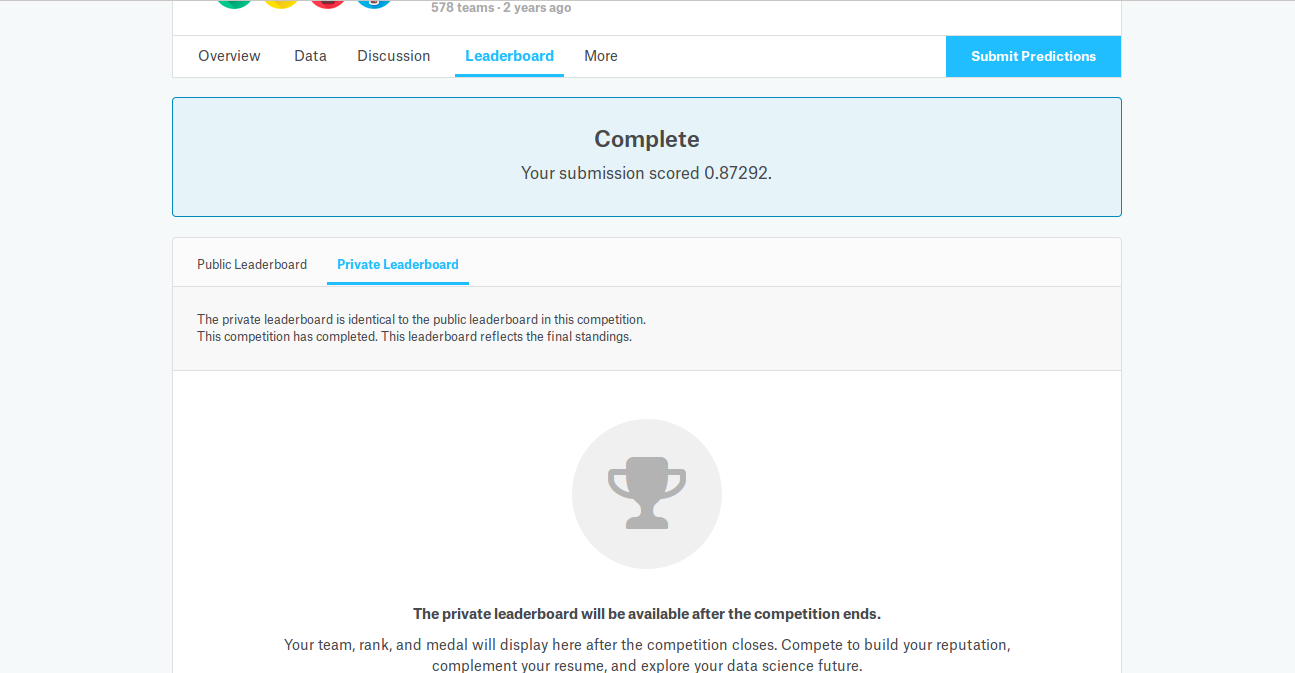

In [12]:
from IPython.display import Image
Image("tmp/Kaggle.png")

Now you can re-build the model by excluding these words and again upload your results on Kaggle. 

Doing this simple trick can further improve your accuracy to 0.81768.

For final submission attach the screen-shot of the leader-board with your score

Insert ScreenShot of Leader-board Below
----------------------------------------
